### Imports

In [3]:
import pandas as pd
import quandl
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2020-01-01')
aapl = pd.DataFrame(web.DataReader('AAPL','yahoo', start, end)['Adj Close'])
msft = pd.DataFrame(web.DataReader('MSFT','yahoo', start, end)['Adj Close'])
goog = pd.DataFrame(web.DataReader('GOOG','yahoo', start, end)['Adj Close'])
amzn = pd.DataFrame(web.DataReader('AMZN','yahoo', start, end)['Adj Close'])

In [5]:
msft.head()

,Adj Close
Date,
2012-01-03,21.959635
2012-01-04,22.476425
2012-01-05,22.706108
2012-01-06,23.058842
2012-01-09,22.755325


In [6]:
msft.tail()

,Adj Close
Date,
2019-12-24,156.515396
2019-12-26,157.798309
2019-12-27,158.086731
2019-12-30,156.724243
2019-12-31,156.833633


In [7]:
for df_stocks in (aapl,msft,goog,amzn):
    df_stocks['Normed Return'] = df_stocks['Adj Close']/df_stocks.iloc[0]['Adj Close']

In [8]:
msft.head()

,Adj Close,Normed Return
Date,,
2012-01-03,21.959635,1.000000
2012-01-04,22.476425,1.023534
2012-01-05,22.706108,1.033993
2012-01-06,23.058842,1.050056
2012-01-09,22.755325,1.036234


### Assuming the following distribution

35% Apple

20% Microsft

35% Google

10% Amazon

In [9]:
for df_stocks, allo in zip((aapl,msft,goog,amzn),(0.35,0.2,0.35,0.1)):
    df_stocks['Allocation'] = df_stocks['Normed Return']*allo

In [10]:
msft.head()

,Adj Close,Normed Return,Allocation
Date,,,
2012-01-03,21.959635,1.000000,0.200000
2012-01-04,22.476425,1.023534,0.204707
2012-01-05,22.706108,1.033993,0.206799
2012-01-06,23.058842,1.050056,0.210011
2012-01-09,22.755325,1.036234,0.207247


### Initial Investment = 1000000

In [11]:
for df_stocks in (aapl,msft,goog,amzn):
    df_stocks['Position Values'] = df_stocks['Allocation']*1000000

In [12]:
msft.head()

,Adj Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,21.959635,1.000000,0.200000,200000.000000
2012-01-04,22.476425,1.023534,0.204707,204706.730282
2012-01-05,22.706108,1.033993,0.206799,206798.594966
2012-01-06,23.058842,1.050056,0.210011,210011.158523
2012-01-09,22.755325,1.036234,0.207247,207246.846721


In [13]:
all_pos_vals = [aapl['Position Values'], msft['Position Values'], goog['Position Values'], amzn['Position Values']]

portfolio_val = pd.concat(all_pos_vals, axis = 1)
portfolio_val.columns = ['AAPL Pos', 'MSFT Pos', 'GOOG Pos', 'AMZN Pos']

In [14]:
portfolio_val.head()

,AAPL Pos,MSFT Pos,GOOG Pos,AMZN Pos
Date,,,,
2012-01-03,350000.000000,200000.000000,350000.000000,100000.000000
2012-01-04,351881.012028,204706.730282,351509.612143,99150.977890
2012-01-05,355787.636424,206798.594966,346633.655472,99206.837860
2012-01-06,359506.920947,210011.158523,341904.996112,101999.665897
2012-01-09,358936.684209,207246.846721,327408.665724,99737.473483


In [15]:
portfolio_val['Total Position'] = portfolio_val.sum(axis =1)

In [16]:
portfolio_val.head()

,AAPL Pos,MSFT Pos,GOOG Pos,AMZN Pos,Total Position
Date,,,,,
2012-01-03,350000.000000,200000.000000,350000.000000,100000.000000,1.000000e+06
2012-01-04,351881.012028,204706.730282,351509.612143,99150.977890,1.007248e+06
2012-01-05,355787.636424,206798.594966,346633.655472,99206.837860,1.008427e+06
2012-01-06,359506.920947,210011.158523,341904.996112,101999.665897,1.013423e+06
2012-01-09,358936.684209,207246.846721,327408.665724,99737.473483,9.933297e+05


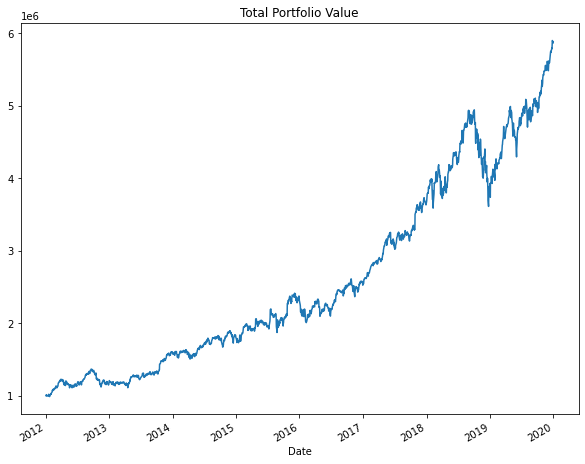

In [17]:
portfolio_val['Total Position'].plot(figsize=(10,8))
plt.title('Total Portfolio Value');

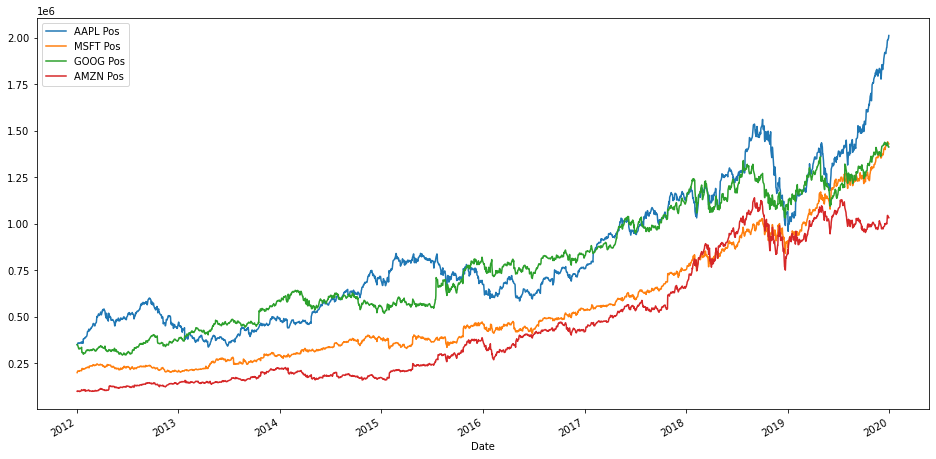

In [18]:
portfolio_val.drop('Total Position', axis=1).plot(figsize=(16,8))

In [19]:
portfolio_val['Daily Return'] = portfolio_val['Total Position'].pct_change(1)

In [20]:
portfolio_val.head()

,AAPL Pos,MSFT Pos,GOOG Pos,AMZN Pos,Total Position,Daily Return
Date,,,,,,
2012-01-03,350000.000000,200000.000000,350000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,351881.012028,204706.730282,351509.612143,99150.977890,1.007248e+06,0.007248
2012-01-05,355787.636424,206798.594966,346633.655472,99206.837860,1.008427e+06,0.001170
2012-01-06,359506.920947,210011.158523,341904.996112,101999.665897,1.013423e+06,0.004954
2012-01-09,358936.684209,207246.846721,327408.665724,99737.473483,9.933297e+05,-0.019827


In [21]:
# SHARPE RATIO   -- Assuming 0% risk free rate

SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [22]:
SR

0.07833263094247132

In [23]:
# ANNUALIZED SHARPE RATIO

ASR = SR *(252**0.5)

In [24]:
ASR

1.2434919660910935

In [25]:
import numpy as np

In [26]:
stocks = pd.concat([aapl,msft,goog,amzn],axis=1)

In [27]:
stocks.drop(columns=['Normed Return','Allocation','Position Values'], inplace=True)

In [28]:
stocks.columns = ['AAPL','MSFT','GOOG','AMZN']

In [29]:
stocks.head()

,AAPL,MSFT,GOOG,AMZN
Date,,,,
2012-01-03,50.857235,21.959635,331.462585,179.029999
2012-01-04,51.130558,22.476425,332.892242,177.509995
2012-01-05,51.698215,22.706108,328.274536,177.610001
2012-01-06,52.238651,23.058842,323.796326,182.610001
2012-01-09,52.155792,22.755325,310.067780,178.559998


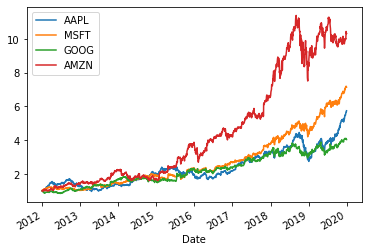

In [30]:
stocks_normed = stocks/stocks.iloc[0]
stocks_normed.plot()

In [31]:
stocks_daily_ret = stocks.pct_change(1)
stocks_daily_ret.head()

,AAPL,MSFT,GOOG,AMZN
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.023534,0.004313,-0.008490
2012-01-05,0.011102,0.010219,-0.013871,0.000563
2012-01-06,0.010454,0.015535,-0.013642,0.028152
2012-01-09,-0.001586,-0.013163,-0.042399,-0.022178


In [32]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,AAPL,MSFT,GOOG,AMZN
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.023261,0.004304,-0.008526
2012-01-05,0.011041,0.010167,-0.013969,0.000563
2012-01-06,0.010399,0.015415,-0.013736,0.027763
2012-01-09,-0.001587,-0.013250,-0.043324,-0.022428


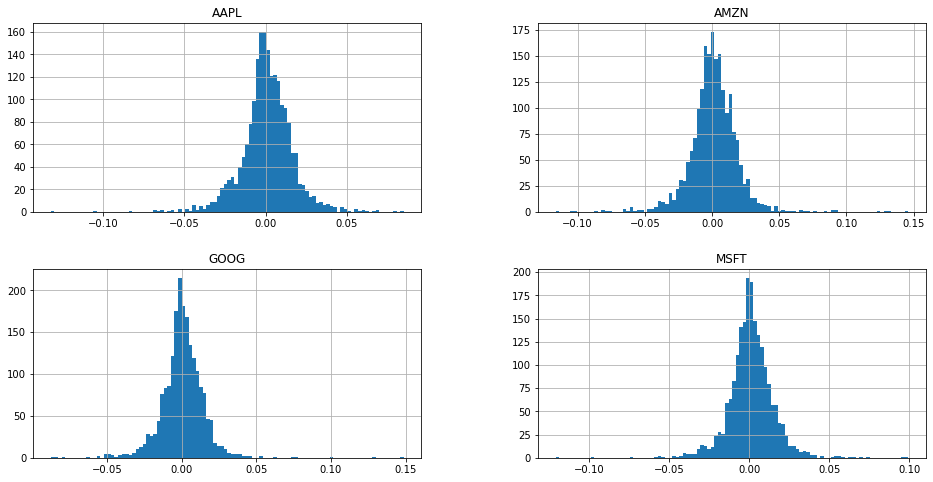

In [33]:
log_ret.hist(bins = 100,figsize=(16,8))
plt.tight_layout;

In [34]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AAPL,2011.0,0.000869,0.016136,-0.131884,-0.006614,0.000886,0.009567,0.085022
MSFT,2011.0,0.000978,0.014286,-0.121033,-0.006035,0.000673,0.008118,0.099413
GOOG,2011.0,0.000694,0.014560,-0.087493,-0.006137,0.000480,0.008238,0.148872
AMZN,2011.0,0.001161,0.018590,-0.116503,-0.007602,0.000974,0.010722,0.146225


In [35]:
log_ret.mean() * 252

AAPL    0.219080
MSFT    0.246358
GOOG    0.174769
AMZN    0.292503
dtype: float64

In [36]:
log_ret.corr()

,AAPL,MSFT,GOOG,AMZN
AAPL,1.000000,0.428259,0.422701,0.358981
MSFT,0.428259,1.000000,0.536885,0.475063
GOOG,0.422701,0.536885,1.000000,0.558671
AMZN,0.358981,0.475063,0.558671,1.000000


In [37]:
log_ret.cov() * 252

,AAPL,MSFT,GOOG,AMZN
AAPL,0.065616,0.024878,0.025027,0.027136
MSFT,0.024878,0.051429,0.028142,0.031793
GOOG,0.025027,0.028142,0.053425,0.038107
AMZN,0.027136,0.031793,0.038107,0.087087


### Single Run for random allocation

In [38]:
np.random.seed(101)

print('stocks')
print(stocks.columns)
print('\n')

# random weights
print('Random weights')
weight = np.array(np.random.random(4))
print(weight)
print('\n')

#rebalancing weights
print('Balanced Weights')
weight = weight / np.sum(weight)
print(weight)
print('\n')

#expected return
print('Expected return')
exp_ret = np.sum(log_ret.mean() * weight) * 252
print(exp_ret)
print('\n')

#expected volatility
print('Expected volatility')
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov()*252, weight)))
print(exp_vol)
print('\n')

#sharpe ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)
print('\n')

stocks
Index(['AAPL', 'MSFT', 'GOOG', 'AMZN'], dtype='object')


Random weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Balanced Weights
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected return
0.23997934919897007


Expected volatility
0.19742806449832231


Sharpe Ratio
1.2155280446514702




In [39]:
np.random.seed(101)
num_portfolio = 5000

all_weights = np.zeros((num_portfolio, len(stocks.columns)))
ret_arr = np.zeros(num_portfolio)
vol_arr = np.zeros(num_portfolio)
sr_arr = np.zeros(num_portfolio)

for ind in range(num_portfolio):
    
    # random weights
    weight = np.array(np.random.random(4))

    #rebalancing weights
    weight = weight / np.sum(weight)
    
    all_weights[ind,:] = weight

    #expected return
    ret_arr[ind] = np.sum(log_ret.mean() * weight) * 252

    #expected volatility
    vol_arr[ind] = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov()*252, weight)))

    #sharpe ratio
    sr_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [40]:
sr_arr.max()

1.256003537907738

In [41]:
max_ind = sr_arr.argmax()

In [42]:
all_weights[max_ind,:]

array([0.2212593 , 0.46349969, 0.02071217, 0.29452884])

In [43]:
max_sr_ret = ret_arr[max_ind]
max_sr_vol = vol_arr[max_ind]

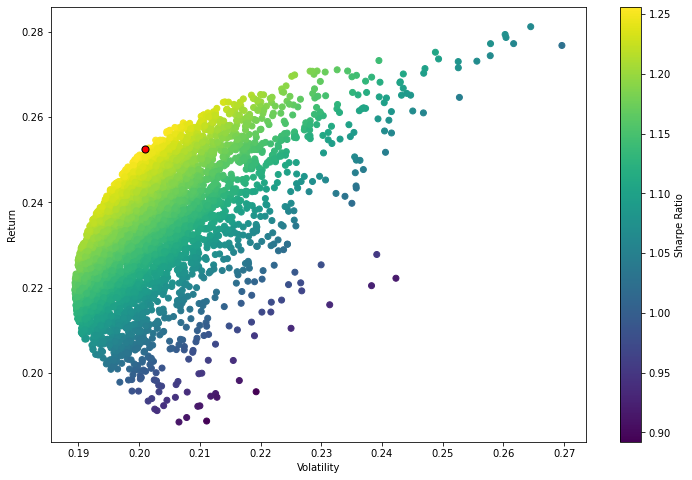

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr,c = sr_arr, cmap='viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# max sharpe ratio
plt.scatter(max_sr_vol, max_sr_ret,c='red',edgecolors='black',s=50)


In [45]:
max_sr_ret

0.25243090303541355

In [46]:
max_sr_vol

0.2009794522202662

### Optimization Function

In [47]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [48]:
from scipy.optimize import minimize

In [49]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [50]:
def check_sum(weights):
    return np.sum(weights) - 1

In [51]:
cons = ({'type':'eq', 'fun':check_sum})

In [52]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [53]:
init_guess = [0.25,0.25,0.25,0.25]

In [54]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [55]:
opt_results

     fun: -1.2578347214644545
     jac: array([-4.05162573e-05,  5.96046448e-05,  7.20861405e-02, -6.39855862e-05])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.234544  , 0.47333477, 0.        , 0.29212123])

In [56]:
opt_results.x

array([0.234544  , 0.47333477, 0.        , 0.29212123])

In [57]:
get_ret_vol_sr(opt_results.x)

array([0.25344019, 0.20148926, 1.25783472])

In [66]:
frontier_y = np.linspace(0.18,0.3,100)

In [67]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [68]:
frontier_volatility = []

for y in frontier_y:
    
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda w:get_ret_vol_sr(w)[0] - y})
    
    res = minimize(minimize_volatility,init_guess, method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(res['fun'])

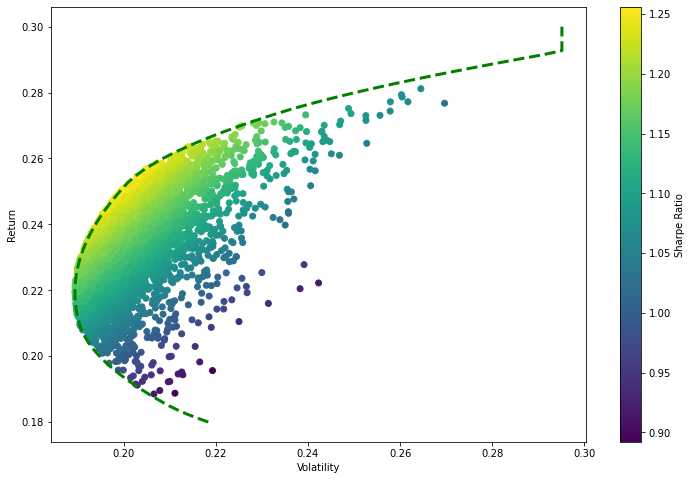

In [69]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sr_arr,cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--',lw=3)